# Predicting Song Popularity with ML


* Student name: Tim Rabbitt
* Student pace: Self paced
* Scheduled project review date/time: 11/23/22 11:00AM 
* Instructor name: Abhineet Kulkarni

## Business Understanding
Rabbitt Record Company has signed many new talented music artists with the hope that their acquired talent can create some of the more popular tracks in circulation. Considering today's creative and competitive music industry, the record company would like to get a leg up on the competition by providing its artists with the helpful information they need to produce the next big hit. 

**Stakeholder:** Rabbitt Record Company

**Business Problem:** Rabbitt Record Company would like to help their artists write the most popular songs on the market.

**Business Question:** Can we accurately predict a newly written song's popularity given certain audio statistics? Which of these statistics is most important in determining popularity?

By analyzing the top songs of the 2000s and the features that contributed to their success, we hope to be able to accurately predict a newly written song's popularity, specifically whether or not that song will be in the top 20 percent. Additionally, we hope to learn what features contribute the most to its popularity.

## Data Understanding

The data used for this analysis was provided by Kaggle. This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and its qualities.


* `artist`: Name of the Artist.
* `song`: Name of the Track.
* `duration_ms`: Duration of the track in milliseconds.
* `explicit`: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* `year`: Release Year of the track.
* `popularity`: The higher the value the more popular the song is.
* `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* `genre`: Genre of the track.

Further information on this dataset can be found at [Kaggle.com](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019)

## Methods

While a linear regression model would be appropriate for this analysis, we wanted to build a classification model that would predict whether or not a song's popularity would be in the 80th percentile. We have divided the popularity column into 2 classes (A, B). Class A represents the 80th percentile, while Class B represents all songs below the 80th percentile. We then built multiple classification models including Decision Tree, K-Nearest Neighbors, Random Forest, and Gradient Boosting. Using an iterative approach beginning with a baseline model and followed by hyperparameter tuning using GridSearchCV, we believe we can produce an adequate model to predict song popularity. 

## Data Preparation

In [1]:
#Importing useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

In [2]:
# Importing the dataset and printing first 5 rows

df = pd.read_csv('zippedData/songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
# Viewing the shape of the dataframe

df.shape

(2000, 18)

With 2000 songs each consisting of 18 features, this dataset has adequate complexity for this project.  

In [4]:
# Interpreting descriptive statistics of the dataset

df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


The majority of our features consist of values between 0 and 1, while others such as `duration_ms`, `key`, and `tempo` are on a different scale. 

In [5]:
# Investigating d_types

df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

We have several different data types in our dataset. Because we are building a classification model and not a regression, we will divide popularity into two classes (A and B). Class A will consist of songs whose popularity is in the 80th percentile, Class B will consist of songs whose popularity is below the 80th percentile. 

Additionally, when you consider the business problem at hand, `artist` and `song` will not be helpful features when it comes to writing new music so those object dtype columns will be dropped from the dataset. Genre is the only other object dtype remaining which we will create dummy variables for. 

Before we can divide the `popularity` column based according to percentiles and assign classes, we want to first check to make sure there are no null or missing values.

In [6]:
# Popularity value counts

df['popularity'].value_counts()

0     126
69     76
68     75
73     69
74     69
     ... 
16      1
17      1
18      1
24      1
89      1
Name: popularity, Length: 76, dtype: int64

It appears we have 126 values of 0, these values will have a negative effect on our model's ability to predict song popularity based on certain audio statistics. Assuming these were data entry errors, we will drop these songs from the dataframe.

In [7]:
# df now equals dataframe where song popularity value does not equal 0

df = df[df['popularity'] != 0]

As was discussed above, we could apply a logistic regression model to this dataset to predict song popularity given our target variable is continuous. However, for this project, we wanted to develop a classification model that helps to accomplish the same goal. In order to do so we will split our continuous target variable into two classes based on percentiles of song popularity values. We will call this new target feature `popularity_rank`.

In [8]:
# Creating a popularity rank column based on popularity quantiles

df['popularity_rank'] = pd.qcut(df['popularity'], 10, labels=False)

df['popularity_rank'] = df['popularity_rank'].replace([8,9],'A')
df['popularity_rank'] = df['popularity_rank'].replace([0,1,2,3,4,5,6,7],'B')


In [9]:
# Viewing dataframe with new popularity_rank column
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity_rank
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,A
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",A
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",B
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal",A
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,B


In [10]:
# Converting explicit boolean values to binary integers

df['explicit'].replace({True: 1, False:0}, inplace=True)
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity_rank
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,A
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",A
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",B
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal",A
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,B


When you consider the business problem at hand `artist`, `song`, and `year` should not be contributing features when it comes to a new artist writing music, they are features that are added after the creative process is complete. Therefore, those columns will be dropped from the data set.

In [11]:
# Droping artist, song, and year from dataset

df = df.drop(['artist', 'song', 'year', 'popularity'], axis=1)

In [12]:
# Viewing the dataframe

df.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity_rank
0,211160,0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,A
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",A
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",B
3,224493,0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal",A
4,200560,0,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,B


Genre is the only other object data type remaining, we will create dummy variables for that feature for use in our models. Before we do that we will need to clean the genre column so we do not have overlapping or redundant variables.

In [13]:
# Removing punctuation and using .explode() to address genre overlap

df['genre'] = df['genre'].str.split(',') 
df = df.explode('genre')

In [14]:
# Viewing genre column value counts

df['genre'].value_counts()

pop                  856
hip hop              742
 pop                 669
 R&B                 417
 Dance/Electronic    307
rock                 158
 rock                 67
 metal                57
 latin                46
Dance/Electronic      38
set()                 22
 Folk/Acoustic        15
latin                 14
R&B                   13
 country              10
World/Traditional      9
metal                  9
country                9
 easy listening        6
 blues                 4
Folk/Acoustic          3
 jazz                  2
 hip hop               2
 classical             1
easy listening         1
Name: genre, dtype: int64

Looking at the value counts above it looks like there is unwanted spacing that is contributing to there being more genres than are actually present. We will want to remove the spaces so that we have the appropriate number of genres represented in the dataset.

In [15]:
# Removing unwanted spaces from genre column

df['genre'] = df['genre'].str.replace(" ", "")

In [16]:
# Viewing new genre value counts

df['genre'].value_counts()

pop                  1525
hiphop                744
R&B                   430
Dance/Electronic      345
rock                  225
metal                  66
latin                  60
set()                  22
country                19
Folk/Acoustic          18
World/Traditional       9
easylistening           7
blues                   4
jazz                    2
classical               1
Name: genre, dtype: int64

Now that we have cleaned up the genre column those value counts look much better. However, 22 songs that have a genre of set(), these seem to be a mistake. Considering there are only 22 occurrences, these will be dropped from the dataset.

In [17]:
# Dropping set() genre

df = df[df['genre'] != 'set()']

In [18]:
# Creating genre dummy variables and viewing dataframe

genre_dummies = pd.get_dummies(df['genre'], prefix='genre', drop_first=True)
df = pd.concat([df.drop('genre', axis=1), genre_dummies], axis=1)
df.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_blues,genre_classical,genre_country,genre_easylistening,genre_hiphop,genre_jazz,genre_latin,genre_metal,genre_pop,genre_rock
0,211160,0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,...,0,0,0,0,0,0,0,0,1,0
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,...,0,0,0,0,0,0,0,0,0,1
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,...,0,0,1,0,0,0,0,0,0,0


## Modeling

### Train Test Split/SMOTE/Standardization

Before we begin our modeling, we will create our target variable using our `popularity_rank` column. We will create our X variable using all other features in our dataset. We will then create our train and test set using `train_test_split()`. 

In [19]:
# Assigning variables and splitting data into train and test sets

X = df.drop('popularity_rank', axis=1)
y = df['popularity_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

To address class imbalance (Class B makes up approximately 80 percent of the data) we will apply SMOTE to our training set to create new synthesized examples of the minority Class A. 

In [20]:
# Importing SMOTE 
from imblearn.over_sampling import SMOTE

# Viewing original y_train class distribution
print(y_train.value_counts()) 

# Fitting SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE(random_state=0).fit_resample(X_train, y_train) 

# Previewing synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

B    2158
A     433
Name: popularity_rank, dtype: int64
B    2158
A    2158
Name: popularity_rank, dtype: int64


Seeing that some of our audio statistics like `duration_ms`, `key`, and `tempo` are on a different scale compared to the rest of the dataset we should consider some form of normalization. We will use StandardScaler to standardize the data so that our models, especially our K-nearest neighbors model, can have better accuracy.

In [21]:
# Fitting and transforming the data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train_resampled)
scaled_data_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head() 

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_blues,genre_classical,genre_country,genre_easylistening,genre_hiphop,genre_jazz,genre_latin,genre_metal,genre_pop,genre_rock
0,0.420542,1.940051,-1.254170,0.502446,1.109399,0.607000,-0.943222,2.499796,0.707639,-0.165139,...,-0.021532,-0.015223,-0.059056,-0.034056,2.390039,-0.021532,-0.101487,-0.110432,-0.726118,-0.213407
1,1.802309,-0.515450,-2.624160,1.127964,-0.965581,-0.275233,1.060196,-0.591830,-0.784732,-0.165081,...,-0.021532,-0.015223,-0.059056,-0.034056,-0.418403,-0.021532,-0.101487,-0.110432,1.377187,-0.213407
2,-0.004018,-0.515450,0.371753,0.435901,0.516547,0.165085,-0.943222,-0.372656,-0.781670,-0.165067,...,-0.021532,-0.015223,-0.059056,-0.034056,-0.418403,-0.021532,-0.101487,-0.110432,1.377187,-0.213407
3,0.293747,1.940051,0.048074,-2.106100,0.812973,-1.608432,1.060196,0.366041,-0.427598,-0.165139,...,-0.021532,-0.015223,-0.059056,-0.034056,2.390039,-0.021532,-0.101487,-0.110432,-0.726118,-0.213407
4,0.933561,-0.515450,-0.230441,-0.362633,-0.076304,-0.195901,1.060196,-0.762298,0.315370,-0.165139,...,-0.021532,-0.015223,-0.059056,-0.034056,-0.418403,-0.021532,-0.101487,-0.110432,1.377187,-0.213407


### Baseline Decision Tree Model

Our first model will be a baseline decision tree. We will fit this model using our scaled training set using default parameters.

In [22]:
# Instantiating DecisionTreeClassifier and fitting to training set

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(scaled_data_train, y_train_resampled)

DecisionTreeClassifier(random_state=0)

In [23]:
# Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.7692358992152833


In [24]:
# Assessing train and test accuracy scores

from sklearn.metrics import accuracy_score

dt_baseline_train_preds = dt.predict(scaled_data_train)
dt_baseline_test_preds = dt.predict(scaled_data_test)

dt_baseline_train_accuracy = accuracy_score(y_train_resampled, dt_baseline_train_preds)
dt_baseline_test_accuracy = accuracy_score(y_test, dt_baseline_test_preds)

print(f"Baseline DT Train Accuracy: {dt_baseline_train_accuracy :.2%}")
print(f"Baseline DT Test Accuracy: {dt_baseline_test_accuracy :.2%}")

Baseline DT Train Accuracy: 99.93%
Baseline DT Test Accuracy: 68.17%


Our baseline decision tree model had a testing accuracy of 68%, meaning that of all of the predictions that our model made it was correct 68% of the time. That isn't bad considering this is merely a baseline model with default parameters. Further exploration should be done into the precision, recall, and F1-score of each class. Viewing a confusion matrix and classification report can provide those scores and can help to answer our business problem.  

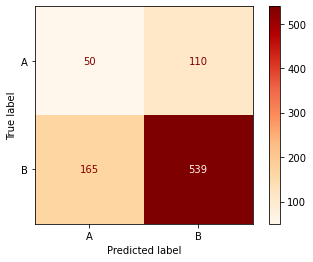

              precision    recall  f1-score   support

           A       0.23      0.31      0.27       160
           B       0.83      0.77      0.80       704

    accuracy                           0.68       864
   macro avg       0.53      0.54      0.53       864
weighted avg       0.72      0.68      0.70       864



In [25]:
# Generate confusion matrix and print classification report

from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(dt, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, dt_baseline_test_preds))

**Model Observations:**
* A F1-score of .27 for Class A is not ideal. 
* We have a training accuracy of 99% and a testing accuracy of 68%, suggesting our model is significantly overfitting. By adjusting some hyperparameters, we will try to increase our precision, recall and F1 scores for Class A, and try to address overfitting. 
* The hyperparamters we will explore in our GridSearch are criterion, max_depth, and min_samples_split.

In [26]:
# Creating a parameter grid for decision tree GridSearch

dt_param_grid = {
                'criterion': ['gini', 'entropy'],
                'max_depth': np.array(range(1,33)),
                'min_samples_split': [4, 6, 8]
                }

In [27]:
# Applying GridSearch to baseline decision tree model

dt_tuned = GridSearchCV(dt, dt_param_grid, cv=3, return_train_score=True)
dt_tuned.fit(scaled_data_train, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'min_samples_split': [4, 6, 8]},
             return_train_score=True)

In [28]:
# Viewing best parameters selected by GridSearch

dt_tuned.best_params_

{'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 4}

In [29]:
# Cross validation

score = cross_val_score(dt_tuned, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.7757301002634408


In [30]:
# Assessing train and test accuracy scores

dt_tuned_train_preds = dt_tuned.predict(scaled_data_train)
dt_tuned_test_preds = dt_tuned.predict(scaled_data_test)

dt_tuned_train_accuracy = accuracy_score(y_train_resampled, dt_tuned_train_preds)
dt_tuned_test_accuracy = accuracy_score(y_test, dt_tuned_test_preds)

print(f"Tuned DT Train Accuracy: {dt_tuned_train_accuracy :.2%}")
print(f"Tuned DT Test Accuracy: {dt_tuned_test_accuracy :.2%}")

Tuned DT Train Accuracy: 99.24%
Tuned DT Test Accuracy: 69.91%


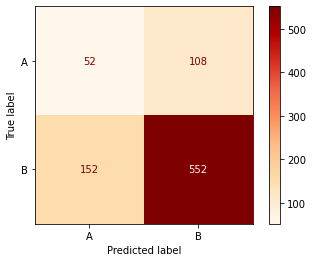

              precision    recall  f1-score   support

           A       0.25      0.33      0.29       160
           B       0.84      0.78      0.81       704

    accuracy                           0.70       864
   macro avg       0.55      0.55      0.55       864
weighted avg       0.73      0.70      0.71       864



In [31]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(dt_tuned, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, dt_tuned_test_preds))

In [32]:
# Comparing baseline and tuned decision tree model accuracy

print(f"Baseline DT Train Accuracy: {dt_baseline_train_accuracy :.2%}")
print(f"Baseline DT Test Accuracy: {dt_baseline_test_accuracy :.2%}")
print('---------------------------------')
print(f"Tuned DT Train Accuracy: {dt_tuned_train_accuracy :.2%}")
print(f"Tuned DT Test Accuracy: {dt_tuned_test_accuracy :.2%}")

Baseline DT Train Accuracy: 99.93%
Baseline DT Test Accuracy: 68.17%
---------------------------------
Tuned DT Train Accuracy: 99.24%
Tuned DT Test Accuracy: 69.91%


By adjusting hyperparameters in our decision tree model we have improved our test accuracy score from 68% to 70%. Our F1-score for Class A saw a slight improvement as well. We saw only a minor drop in our train accuracy, indicating our tuned decision tree model is still significantly overfitting.

Next, we will build a KNN baseline model to see if we can improve our accuracy and F1-score.

## Baseline KNN Model

Our next model we will create will be a baseline K-Nearest Neighbors model. Similar to our decision tree model we will begin with default parameters followed by a GridSearch to optimize model performance. 

In [33]:
# Creating a baseline KNN model and fitting to train set

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(scaled_data_train, y_train_resampled)

KNeighborsClassifier()

In [34]:
# Cross validation

score = cross_val_score(knn, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.7905563378988459


Our KNN baseline cross validation score of .79 is better than our baseline and tuned decision tree models' cross validation scores which is an encouraging sign that this model has better performance in predicting song popularity.

In [35]:
# Assessing train and test accuracy scores

knn_baseline_train_preds = knn.predict(scaled_data_train)
knn_baseline_test_preds = knn.predict(scaled_data_test)

knn_baseline_train_accuracy = accuracy_score(y_train_resampled, knn_baseline_train_preds)
knn_baseline_test_accuracy = accuracy_score(y_test, knn_baseline_test_preds)

print(f"Baseline KNN Train Accuracy: {knn_baseline_train_accuracy :.2%}")
print(f"Baseline KNN Test Accuracy: {knn_baseline_test_accuracy :.2%}")

Baseline KNN Train Accuracy: 87.30%
Baseline KNN Test Accuracy: 67.48%


Our testing accuracy dropped to 67% in our baseline KNN model. Our decision tree model had a testing accuracy of 70%, so we are going in the wrong direction. However, a training accuracy of 87% indicates that this model is not overfitting to the extent our decision tree models had been, which is good.

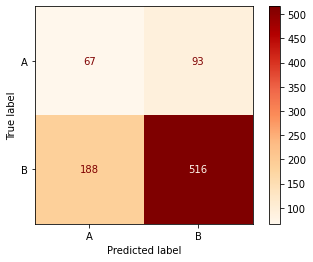

              precision    recall  f1-score   support

           A       0.26      0.42      0.32       160
           B       0.85      0.73      0.79       704

    accuracy                           0.67       864
   macro avg       0.56      0.58      0.55       864
weighted avg       0.74      0.67      0.70       864



In [36]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(knn, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, knn_baseline_test_preds))

Our baseline K-nearest neighbor model has an accuracy of 67% which is worse than both of our decision tree models. However, we did see a better F1-score of .32 for Class A than that of our decision tree model. By adjusting some hyperparameters we hope to increase our F1-score for Class A and increase our test accuracy score. The hyperparameters we will explore in our GridSearch are n_neighbors and our distance parameter. 

In [37]:
# Creating paramter grid for KNN GridSearch

knn_param_grid = {
                'n_neighbors': [10, 15, 20],
                'p': [1, 2, 3],
                 }

In [38]:
# Running GridSearch and fitting to train set

knn_tuned = GridSearchCV(knn, knn_param_grid, cv=3, return_train_score=True)
knn_tuned.fit(scaled_data_train, y_train_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20], 'p': [1, 2, 3]},
             return_train_score=True)

In [39]:
# Viewing GridSearch best parameters

knn_tuned.best_params_

{'n_neighbors': 15, 'p': 1}

In [40]:
# Cross validation for tuned KNN model

score = cross_val_score(knn_tuned, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.8072419966603553


In [41]:
# Assessing train and test accuracy scores

knn_tuned_train_preds = knn_tuned.predict(scaled_data_train)
knn_tuned_test_preds = knn_tuned.predict(scaled_data_test)

knn_tuned_train_accuracy = accuracy_score(y_train_resampled, knn_tuned_train_preds)
knn_tuned_test_accuracy = accuracy_score(y_test, knn_tuned_test_preds)

print(f"Tuned KNN Train Accuracy: {knn_tuned_train_accuracy :.2%}")
print(f"Tuned KNN Test Accuracy: {knn_tuned_test_accuracy :.2%}")

Tuned KNN Train Accuracy: 85.80%
Tuned KNN Test Accuracy: 68.52%


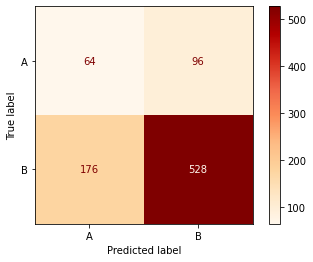

              precision    recall  f1-score   support

           A       0.27      0.40      0.32       160
           B       0.85      0.75      0.80       704

    accuracy                           0.69       864
   macro avg       0.56      0.57      0.56       864
weighted avg       0.74      0.69      0.71       864



In [42]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(knn_tuned, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, knn_tuned_test_preds))

In [43]:
# Comparing baseline and tuned decision tree model accuracy

print(f"Baseline KNN Train Accuracy: {knn_baseline_train_accuracy :.2%}")
print(f"Baseline KNN Test Accuracy: {knn_baseline_test_accuracy :.2%}")
print('---------------------------------')
print(f"Tuned KNN Train Accuracy: {knn_tuned_train_accuracy :.2%}")
print(f"Tuned KNN Test Accuracy: {knn_tuned_test_accuracy :.2%}")

Baseline KNN Train Accuracy: 87.30%
Baseline KNN Test Accuracy: 67.48%
---------------------------------
Tuned KNN Train Accuracy: 85.80%
Tuned KNN Test Accuracy: 68.52%


By adjusting hyperparameters in our KNN model we have improved our test accuracy score from 67% to 69%. Our F1-score for Class A saw no improvement. While we are still overfitting, we saw a drop in our train accuracy from 87% to 86%, indicating our tuned KNN model isn't overfitting to the extent our baseline model or decision tree models were. 

Our tuned KNN model test accuracy score saw no significant improvement when compared to our decision tree models, next we will build a random forest baseline model to see if we can improve our accuracy and F1-score.

## Random Forest Baseline Model

For our next model, we will create a baseline Random Forest model. Similar to our models above we will begin with default parameters followed by a GridSearch to optimize model performance. 

In [44]:
# Instantiating RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(scaled_data_train, y_train_resampled)

RandomForestClassifier(random_state=0)

In [45]:
# Cross validation

score = cross_val_score(forest, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.8830088568563074


In [46]:
# Assessing train and test accuracy scores

forest_baseline_train_preds = forest.predict(scaled_data_train)
forest_baseline_test_preds = forest.predict(scaled_data_test)

forest_baseline_train_accuracy = accuracy_score(y_train_resampled, forest_baseline_train_preds)
forest_baseline_test_accuracy = accuracy_score(y_test, forest_baseline_test_preds)

print(f"Baseline RF Train Accuracy: {forest_baseline_train_accuracy :.2%}")
print(f"Baseline RF Test Accuracy: {forest_baseline_test_accuracy :.2%}")

Baseline RF Train Accuracy: 99.93%
Baseline RF Test Accuracy: 81.48%


With a cross validation score of .88 and a test accuracy of 81%, our baseline random forest model has outperformed all previous models. This is encouraging considering this was accomplished with only default parameters.

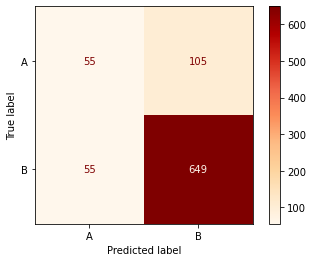

              precision    recall  f1-score   support

           A       0.50      0.34      0.41       160
           B       0.86      0.92      0.89       704

    accuracy                           0.81       864
   macro avg       0.68      0.63      0.65       864
weighted avg       0.79      0.81      0.80       864



In [47]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(forest, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, forest_baseline_test_preds))

Our baseline random forest model had an F1-score of .41 and a test accuracy score of 81%, making this our best performing model thus far. We are overfitting with a cross validation score of .88 and a test score of .81, although not to the extent of our previous models. In our GridSearch will we try to address this by adjusting the max_features and max_depth parameters. We hope our GridSearch will also produce an even better F1-score and accuracy metrics.

### Random Forest Hyperparameter Tuning

In [48]:
# Creating paramter grid for random forest GridSearch

rf_param_grid = {'n_estimators': [300],
                 'criterion': ['gini', 'entropy'],
                 'max_features': [2, 5, 10],
                 'max_depth': [15, 20, 25],
                 'min_samples_split': [2, 4],
                 'min_samples_leaf': [1]}

In [49]:
forest_tuned = GridSearchCV(forest, rf_param_grid, cv=3)
forest_tuned.fit(scaled_data_train, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25], 'max_features': [2, 5, 10],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 4],
                         'n_estimators': [300]})

In [50]:
# Viewing GridSearch best parameters

forest_tuned.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [51]:
# Cross validation

score = cross_val_score(forest_tuned, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.9008464449665795


In [52]:
# Assessing train and test accuracy scores

forest_tuned_train_preds = forest_tuned.predict(scaled_data_train)
forest_tuned_test_preds = forest_tuned.predict(scaled_data_test)

RF_tuned_train_accuracy = accuracy_score(y_train_resampled, forest_tuned_train_preds)
RF_tuned_test_accuracy = accuracy_score(y_test, forest_tuned_test_preds)

print(f"Tuned RF Train Accuracy: {RF_tuned_train_accuracy :.2%}")
print(f"Baseline RF Test Accuracy: {RF_tuned_test_accuracy :.2%}")

Tuned RF Train Accuracy: 99.93%
Baseline RF Test Accuracy: 84.61%


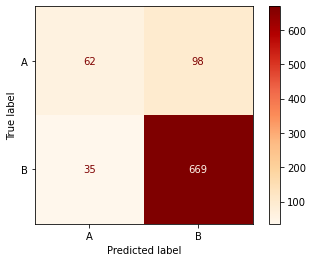

              precision    recall  f1-score   support

           A       0.64      0.39      0.48       160
           B       0.87      0.95      0.91       704

    accuracy                           0.85       864
   macro avg       0.76      0.67      0.70       864
weighted avg       0.83      0.85      0.83       864



In [53]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(forest_tuned, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, forest_tuned_test_preds))

In [54]:
# Comparing baseline and tuned random forest model accuracy

print(f"Baseline RF Train Accuracy: {forest_baseline_train_accuracy :.2%}")
print(f"Baseline RF Test Accuracy: {forest_baseline_test_accuracy :.2%}")
print('---------------------------------')
print(f"Tuned RF Train Accuracy: {RF_tuned_train_accuracy :.2%}")
print(f"Tuned RF Test Accuracy: {RF_tuned_test_accuracy :.2%}")

Baseline RF Train Accuracy: 99.93%
Baseline RF Test Accuracy: 81.48%
---------------------------------
Tuned RF Train Accuracy: 99.93%
Tuned RF Test Accuracy: 84.61%


By adjusting hyperparameters in our random forest model we have improved our test accuracy score from 81% to 85%. Our F1-score for Class A also saw an improvement from .41 to .48, which is great!

Our tuned random forest model with a test accuracy score of 85% significantly outperformed our tuned decision tree model with a test accuracy score of 70%, making our tuned random forest model the best predictor so far. Next, we will build a gradient boost model to see if we can improve our accuracy and F1-score even more.

## XGBoost Baseline Model

Next, we will build a baseline model using gradient boost, particularly XGBoost. XGBoost requires that classification categories be integers that count up from 0. We will instantiate a LabelEncoder and convert both y_train and y_test into arrays containing integers counting up from 0.

In [55]:
# Instantiating XGBoost and fitting to training data

from xgboost import XGBClassifier

boost = XGBClassifier(random_state=0)
boost.fit(scaled_data_train, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# Cross validation

score = cross_val_score(boost, scaled_data_train, y_train_resampled)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.9131542101197374


In [57]:
# Assessing train and test accuracy scores

boost_baseline_train_preds = boost.predict(scaled_data_train)
boost_baseline_test_preds = boost.predict(scaled_data_test)

boost_baseline_train_accuracy = accuracy_score(y_train_resampled, boost_baseline_train_preds)
boost_baseline_test_accuracy = accuracy_score(y_test, boost_baseline_test_preds)

print(f"Baseline Boost Train Accuracy: {boost_baseline_train_accuracy :.2%}")
print(f"Baseline Boost Test Accuracy: {boost_baseline_test_accuracy :.2%}")

Baseline Boost Train Accuracy: 99.93%
Baseline Boost Test Accuracy: 87.27%


This is our best performing baseline model, with a cross validation score of .91 and a test accuracy of 87%.  

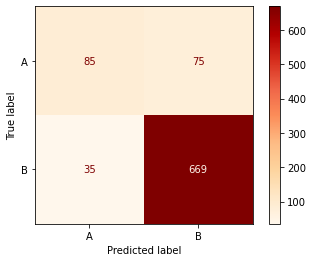

              precision    recall  f1-score   support

           A       0.71      0.53      0.61       160
           B       0.90      0.95      0.92       704

    accuracy                           0.87       864
   macro avg       0.80      0.74      0.77       864
weighted avg       0.86      0.87      0.87       864



In [58]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(boost, scaled_data_test, y_test,
                     cmap='OrRd')
plt.show()

print(classification_report(y_test, boost_baseline_test_preds))

Our baseline gradient boost model had an F1-score of .61 and a test accuracy score of 87%, making this our best performing model thus far. We are still slightly overfitting with a cross validation score of .91 and a test score of .87, although not to the extent of our previous models. We hope our GridSearch will produce an even better F1-score and accuracy metrics by adjusting learning_rate, max_depth, min_child_weight, subsample, and n_estimators.

### XGBoost Hyperparamter Tuning

In [59]:
# Creating paramter grid for XGBoost GridSearch

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 10 , 15],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [200],
}

In [60]:
# Fitting GridSearch to training data

tuned_boost = GridSearchCV(boost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
tuned_boost.fit(scaled_data_train, y_train_resampled)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [61]:
# Assessing train and test accuracy scores

tuned_boost_train_preds = tuned_boost.predict(scaled_data_train)
tuned_boost_test_preds = tuned_boost.predict(scaled_data_test)

tuned_boost_train_accuracy = accuracy_score(y_train_resampled, tuned_boost_train_preds)
tuned_boost_test_accuracy = accuracy_score(y_test, tuned_boost_test_preds)

print(f"Baseline DT Train Accuracy: {tuned_boost_train_accuracy :.2%}")
print(f"Baseline DT Test Accuracy: {tuned_boost_test_accuracy :.2%}")

Baseline DT Train Accuracy: 99.93%
Baseline DT Test Accuracy: 89.35%


In [62]:
# Viewing GridSearch best parameters

tuned_boost.best_params_

{'learning_rate': 0.3,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.5}

In [63]:
# Cross validation

score = cross_val_score(tuned_boost, scaled_data_train, y_train_resampled, cv=3)
print('Mean Cross Validation Score:', np.mean(score))

Mean Cross Validation Score: 0.9073321084318136


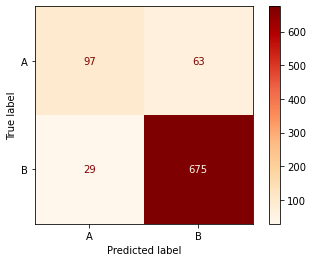

              precision    recall  f1-score   support

           A       0.77      0.61      0.68       160
           B       0.91      0.96      0.94       704

    accuracy                           0.89       864
   macro avg       0.84      0.78      0.81       864
weighted avg       0.89      0.89      0.89       864



In [64]:
# Generate confusion matrix and print classification report

plot_confusion_matrix(tuned_boost, scaled_data_test, y_test,
                     cmap='OrRd', labels=['A', 'B'])
plt.show()

print(classification_report(y_test, tuned_boost_test_preds))

In [65]:
# Comparing baseline and tuned gradient boost model accuracy

print(f"Baseline Boost Train Accuracy: {boost_baseline_train_accuracy :.2%}")
print(f"Baseline Boost Test Accuracy: {boost_baseline_test_accuracy :.2%}")
print('---------------------------------')
print(f"Tuned Boost Train Accuracy: {tuned_boost_train_accuracy :.2%}")
print(f"Tuned Boost Test Accuracy: {tuned_boost_test_accuracy :.2%}")

Baseline Boost Train Accuracy: 99.93%
Baseline Boost Test Accuracy: 87.27%
---------------------------------
Tuned Boost Train Accuracy: 99.93%
Tuned Boost Test Accuracy: 89.35%


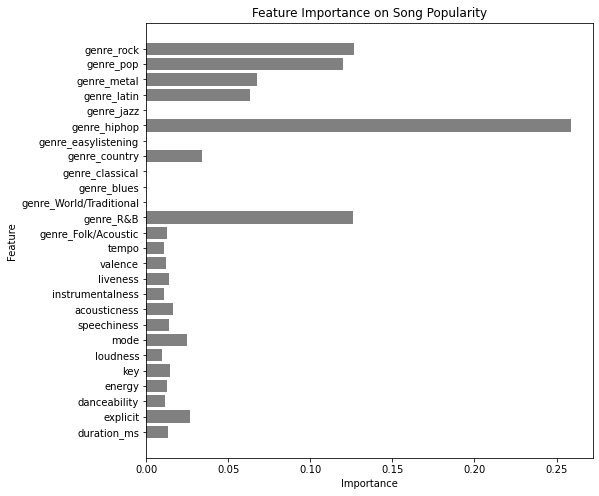

In [66]:
# Plotting feature importances

def plot_feature_importances(model):
    n_features = scaled_data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='grey') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance on Song Popularity')
plot_feature_importances(boost)

## Model Observations:
We created 4 different baseline models: Decision Tree, K-Nearest Neighbors, Random Forest, and XGBoost. After assessing the performance of each model we then used GridSearchCV to select hyperparameters to optimize model performance. We found our tuned XGBoost model to be most effective at predicting song popularity. Here are some observations of our final model:

**Class A (80th percentile):** If we predicted every song to be in Class A, we would have an accuracy of 20%.

**Class B (<80th percentile):** If we predicted every song to be in Class B, we would have an accuracy of 80%.

**Recall:** Our final model correctly identified 61% of the songs that were actually in Class A (true positives), alternatively our model labeled 39% of Class A as Class B (false negatives). 

**Precision:** Of all the times our model predicted a song to be in the 80th percentile, 77% were indeed in Class A (true positives), alternatively 23% were actually in Class B (false positives).

**Accuracy:** Out of all the predictions our model made for Class A and Class B, 89% of them were correct.

**F1-Score:** F1-score is the harmonic mean of precision and recall, meaning both metrics need to be high for the F1-score to be high. The closer this value is to 1, the better your model is overall. With a value of .68, there is room for improvement but it is the highest score of all the models we explored.

**Features:** Hiphop, Rock, and R&B genres have the most influence as features in determining song popularity.

## Conclusion

After our analysis, we can conclude that you can indeed predict song popularity using audio statistics. Our final model had an accuracy of 89%, meaning out of all the predictions our model made, 89% of them were correct. Our model is more likely to produce false negatives, a song that it predicts will be < 80th percentile when it's actually in the 80th percentile, and less likely to produce false positives, a song that it predicts will be in the 80th percentile when it is < 80th percentile. This is good from a business standpoint, as the record company can fund the production of future songs with 77% certainty they will turn out to be popular on the open market.

The feature importance plot above assigns a score to input features based on how useful they are at predicting song popularity. According to this plot a genre of hiphop, R&B, and rock are most important when it comes to predicting song popularity. Pay extra attention to these genres when writing and producing future songs. 




## Limitations and Future Analysis

While we used four different classification models for this project there are several more that may prove to have better performance, a couple that comes to mind would be Naive Bayes and Adaboost. Applying these models to the dataset would make for a more complete exploration of predictive power. We used GridSearchCV to improve the performance of each model, this iterative approach saw each model improve upon its baseline version. However, there are several hyperparameters that we did not address that could help improve model performance. Further analysis that addresses more hyperparameters has the potential to produce improved model performance. Additionally, future analysis and modeling might want to consider a couple of items:

1. The data we used in this analysis was from 2000-2019. Using songs and their audio statistic from 2019-2022 would help to make song popularity predictions in a more present music industry.


2. We wanted to make a classification model for this project, future analysis should look into a regression model and its capabilities in predicting song popularity.